# (실습) 통계 기초

**참고**

[통계 기초](https://codingalzi.github.io/datapy/from_scratch_2.html)에
정의된 다음 함수들을 활용할 수 있다.

- mean
- median
- quantile
- mode
- data_range
- iqr
- var
- std
- cov
- corrcoef

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [1]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

In [2]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리키며,
높은 숫자일 수록 수질은 나쁘다.

In [3]:
# 클로로필-A 수치 100개

chl_a = [51, 51, 53, 53, 54, 55, 57, 57, 59, 60,
         61, 62, 63, 64, 65, 66, 67, 67, 67, 69,
         70, 71, 71, 72, 73, 75, 75, 76, 77, 79,
         81, 81, 83, 83, 85, 86, 87, 88, 88, 88,
         89, 89, 90, 91, 92, 95, 96, 96, 97, 98,
         98, 98, 99, 101, 101, 102, 102, 103, 104, 104,
         104, 104, 105, 106, 107, 108, 110, 111, 111, 112,
         112, 112, 113, 114, 114, 116, 116, 116, 117, 118,
         118, 118, 118, 119, 120, 120, 121, 122, 125, 120,
         121, 121, 121, 122, 122, 122, 122, 124, 125, 124]

In [4]:
# 시간당 방류량 수치 100개

flow = [25, 25, 24, 24, 22, 22, 21, 21, 20, 20,
        19, 19, 19, 18, 18, 18, 17, 17, 17, 16,
        16, 16, 17, 16, 17, 17, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
        15, 14, 15, 14, 14, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 12, 12, 12, 12,
        12, 12, 52, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 11, 12, 12, 12, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 10,
        9, 9, 9, 9, 9, 9, 9, 49, 9, 9]

**문제**

각각의 데이터셋 크기가 100임을 확인하라.

힌트: `len()` 함수

In [5]:
len(chl_a)

100

In [6]:
len(flow)

100

**문제**

가장 높은 클로로필-A의 수치는 얼마인가?

In [7]:
max(chl_a)

125

가장 낮은 클로로필-A의 수치는 얼마인가?

In [8]:
min(chl_a)

51

**문제**

가장 높은 시간당 방류량 수치는 얼마인가?

In [9]:
max(flow)

52

가장 낮은 시간당 방류량 수치는 얼마인가?

In [10]:
min(flow)

9

## 데이터 살펴보기

**문제**

클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

힌트: `from collections import Counter`

In [11]:
from collections import Counter

xs = range(101)

chla_counts = Counter(chl_a)
ys = [chla_counts[x] for x in xs]

In [12]:
max(chla_counts.values())

5

In [13]:
min(chla_counts.values())

1

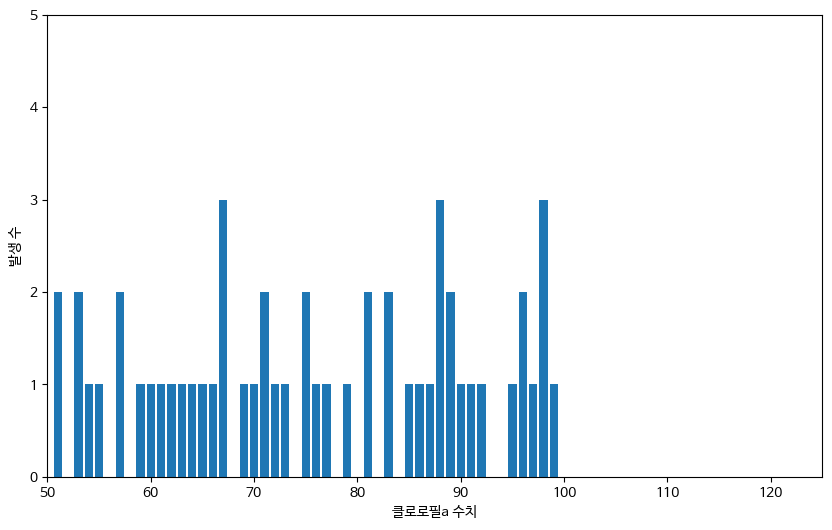

In [14]:
# 막대그래프 그리기
plt.bar(xs, ys)

# 그래프 설정
plt.axis([50, 125, 0, 5])        # x축은 0부터 100까지, y축은 0부터 25까지 눈금 사용
plt.xlabel("클로로필a 수치")     # x축 눈금 설명
plt.ylabel("발생 수")            # y축 눈금 설명
plt.show()

## 중심 경향성과 평균

**문제**

방류량의 평균값을 계산하라.

In [15]:
def mean(xs):
    """
    xs: 리스트로 구현된 데이터셋
    """

    return sum(xs) / len(xs)

In [16]:
mean(flow)

14.93

**문제**

방류량의 중위수를 계산하라.

In [17]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return _median_odd(xs)

In [18]:
median(flow)

13.0

**문제**

방류량의 최빈값을 계산하라.

In [19]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

In [20]:
mode(flow)

{11}

**문제**

방류량의 제1, 제3 사분위수를 계산하라.

In [21]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 하위 p% 위치
    """
    
    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

In [22]:
print("제1사분위수:", quantile(flow, 0.25))
print("제3사분위수:", quantile(flow, 0.75))

제1사분위수: 11
제3사분위수: 16


## 산포도와 분산

**문제**

클로로필-A 데이터의 범위를 계산하라.

In [23]:
def data_range(xs):
    return max(xs) - min(xs)

In [24]:
data_range(chl_a)

74

**문제**

클로로필-A 데이터의 분산을 계산하라.

In [25]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

In [26]:
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

In [27]:
var(chl_a)

511.9195959595961

**문제**

클로로필-A 데이터의 표준편차를 계산하라.

In [28]:
import math

def std(xs):
    return math.sqrt(var(xs))

In [29]:
std(chl_a)

22.62564023314249

## 선형 상관관계

**문제**

클로로필-A와 시간당 방류량 사이의 공분산을 계산하고
두 데이터 사이의 상관관계를 설명하라.

In [30]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [31]:
cov(chl_a, flow)

-66.88868686868692

즉, 방류량이 증가할 수록 클로로필-A의 수치가 떨어진다고 판단할 수 있다.

참고로 클로로필-A의 수치가 증가할 수록 방류량의 수치가 떨어진다고 말할 수도 있으나
이는 자연현상을 설명하기에는 적절하지 않다. 
클로로필-A, 즉 엽록소는 물의 흐름이 느릴 때 발생하는 녹조 현상에 크게 관여한다.
그리고 물의 흐름이 빠를 수록 녹조현상이 덜 발생하기에 클로로필-A의 수치가 떨어지는 인과관계가 성립한다.

**문제**

클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고
두 데이터 사이의 선형 상관관계를 설명하라.

In [32]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = std(xs) # xs의 표준편차
    stdev_y = std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # 표준편차가 0인 데이터셋과의 선형 상관관계는 없음.

In [33]:
corrcoef(chl_a, flow)

-0.46344389682687775

이전 문제와 마찬가지로 방류량이 증가할 수록 클로로필-A의 수치가 선형적으로 떨어진다고 판단할 수 있다.

## 이상치

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려보자.

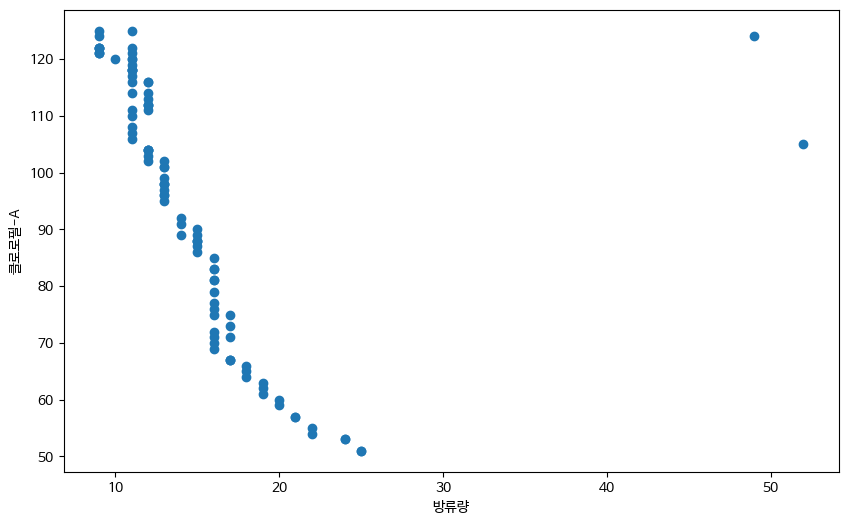

In [34]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

방류량이 증가할 수록 클로로필-A 수치가 떨어지는 게 일반적이다.
하지만 방류량이 40이상임에도 불구하고 클로로필-A 수치가 높은 두 개의 데이터는
일반적인 경향과 많이 어긋난다.
따라서 이 두 데이터를 이상치로 간주할 수 있다.

**문제**

클로로필-A 데이터와 방수량 두 데이터셋 모두에서
이상치에 해당하는 두 개의 값을 제거한다.

답

먼저 방류량 수치가 40 이상인 데이터의 인덱스를 확인하면
62번과 97번으로 확인된다.

In [35]:
over40_index = []

for i in range(100):
    if flow[i] >= 40:
        over40_index.append(i)
        
over40_index

[62, 97]

따라서 방류량과 클로로필-A 데이터 모두에서 62번과 97번을 제거한다.
다양한 방식으로 할 수 있지마 여기서는 `for` 반복문을 활용한다.

In [36]:
new_chl_a = []

for i in range(100):
    if i in over40_index:
        continue
    
    new_chl_a.append(chl_a[i])
    

데이터 2개가 제거되었음을 확인한다.

In [37]:
len(new_chl_a)

98

방류양 데이터도 동일한 방식을 이용한다.

In [38]:
new_flow = []

for i in range(100):
    if i in over40_index:
        continue
    
    new_flow.append(flow[i])

In [39]:
len(new_flow)

98

이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려라.

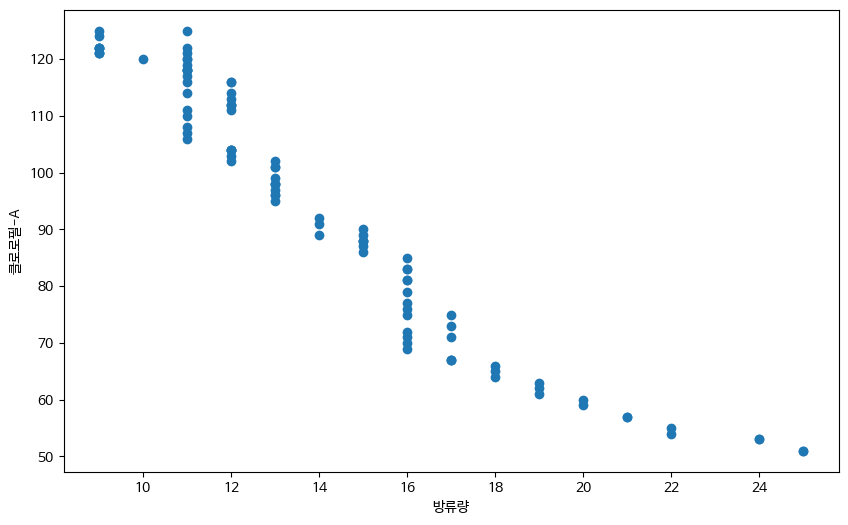

In [40]:
plt.scatter(new_flow, new_chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 아래 값들이 어떻게 달라졌는지 설명하라.

- 평균값, 중위수, 최빈값
- 범위, 사분범위, 분산, 표준편차
- 공분산, 피어슨 상관계수

답

앞서 정의한 적절한 함수들을 이용하여 값의 변화를 확인한다.

- 평균: 평균은 조금씩 줄어들었다. 이유는 상대적으로 큰 두 이상치가 제거되었기 때문이다.
하지만 데이터 수가 많아서 평균값은 크게 줄지는 않는다.

In [41]:
mean(chl_a)

93.86

In [42]:
mean(new_chl_a)

93.43877551020408

In [43]:
mean(flow)

14.93

In [44]:
mean(new_flow)

14.204081632653061

중위수는 거의 변화 없다. 즉, 중위수는 이상치에 둔감하다.

In [45]:
median(chl_a)

98.0

In [46]:
median(new_chl_a)

97.5

In [47]:
median(flow)

13.0

In [48]:
median(new_flow)

13.0

최빈값 또한 변화 없다. 이상치의 빈도가 일반적으로 높지 않아서
최빈값에 영향을 주지 않는다.

In [49]:
mode(chl_a)

{122}

In [50]:
mode(new_chl_a)

{122}

In [51]:
mode(flow)

{11}

In [52]:
mode(new_flow)

{11}

- 범위, 사분범위, 분산, 표준편차

이상치를 제거하면 방류량의 범위가 크게 줄어든다.

In [53]:
data_range(chl_a)

74

In [54]:
data_range(new_chl_a)

74

In [55]:
data_range(flow)

43

In [56]:
data_range(new_flow)

16

반면에 사분범위는 변화가 없다. 
즉, 사분범위는 이상치에 둔감하다.

In [57]:
def iqr(xs):
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [58]:
iqr(chl_a)

41

In [59]:
iqr(new_chl_a)

41

In [60]:
iqr(flow)

5

In [61]:
iqr(new_flow)

5

방류량의 분산과 표준편차가 크게 줄어들었다.
즉, 이상치의 영향이 없어져서 데이터의 분산 정도가 크게 줄어들었다.

In [62]:
var(chl_a)

511.9195959595961

In [63]:
var(new_chl_a)

511.6508520934147

In [64]:
var(flow)

40.6920202020202

In [65]:
var(new_flow)

14.865137807700393

In [66]:
std(chl_a)

22.62564023314249

In [67]:
std(new_chl_a)

22.61970053058649

In [68]:
std(flow)

6.379029722616144

In [69]:
std(new_flow)

3.8555334011911233

- 공분산, 상관계수

이상치를 제거하니 공분산과 상관계수의 절대값이 커졌다.
즉, 두 데이터의 음의 상관관계가 더 명확해졌다.

In [70]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [71]:
cov(chl_a, flow)

-66.88868686868692

In [72]:
cov(new_chl_a, new_flow)

-83.42036608457812

In [73]:
corrcoef(chl_a, flow)

-0.46344389682687775

In [74]:
corrcoef(new_chl_a, new_flow)

-0.9565347907790098